<a href="https://colab.research.google.com/github/shikharyadav01/ExplorateDataAnalysisEDA/blob/main/ExplorateDataAnalysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install seaborn==0.13.2


df = pd.read_csv('Customer Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# REPLACING THE BLANK VALUES AS ZERO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.info()

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['customerID'].duplicated().sum()

0

In [ ]:
def conv(value):
  if value == 1:
    return "yes"
  else:
    return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [ ]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# convert 0 and 1 value to senior citizen to yes/no to make it easier to undertand


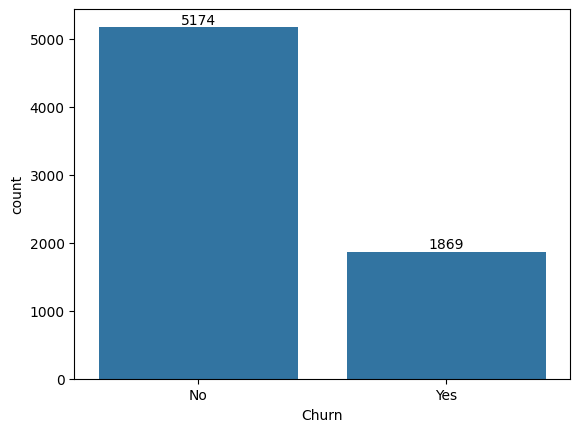

In [ ]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.show()

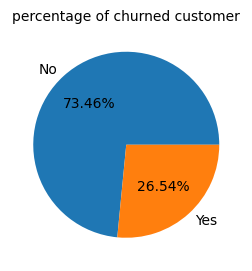

In [ ]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn': "count"}) # Changed 'churn' to 'Churn'
gb = df.groupby("Churn").agg({'Churn': "count"}) # Changed 'churn' to 'Churn'
gb

plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("percentage of churned customer",fontsize = 10 )
plt.show()

## from the given pie chart we can conclude that 26.54 % of our costumers are churned out # lets not explore the reason behind **it**

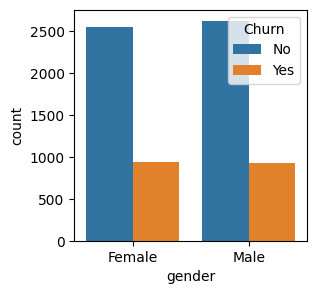

In [ ]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender",data = df, hue = "Churn")
plt.show()

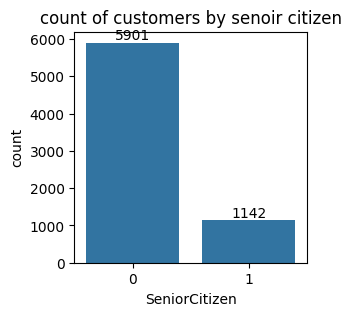

In [ ]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x = "SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customers by senoir citizen")
plt.show()

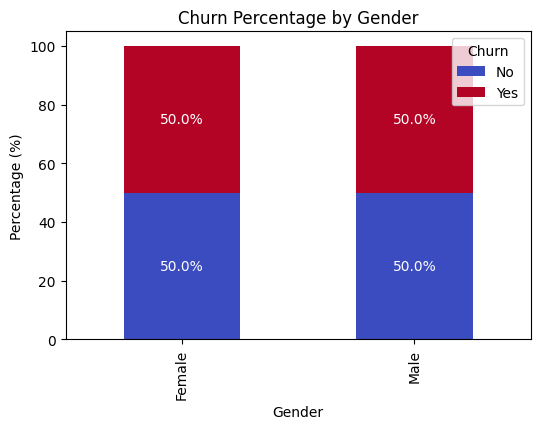

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace this with your actual data)
data1 = {
    "gender": ["Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male"],
    "Churn": ["Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes"]
}
df = pd.DataFrame(data)

# Count occurrences of each category
gender_churn_counts = df.groupby(["gender", "Churn"]).size().unstack()

# Convert counts to percentages
gender_churn_percent = gender_churn_counts.div(gender_churn_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = gender_churn_percent.plot(kind="bar", stacked=True, figsize=(6,4), colormap="coolwarm")

# Add labels for each bar segment
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

# Set labels and title
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.title("Churn Percentage by Gender")
plt.legend(title="Churn", loc="upper right")

# Show plot
plt.show()


# compartve a greater percentage of people in senoir citizen catogery have churned


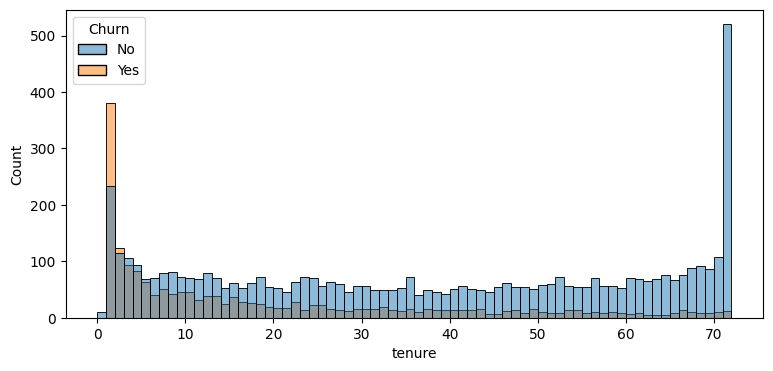

In [32]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

## people who have used our services for  long time have stayed and people who have used your services for short time have churned

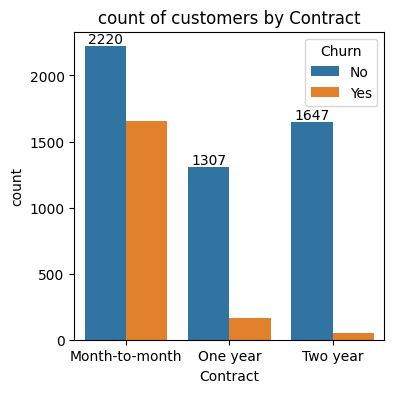

In [35]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract",data = df , hue ="Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customers by Contract")
plt.show()

# people who have month to month subricpiton are lickley to churn out compare to people who have 1 or 2 year of subricption

In [38]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

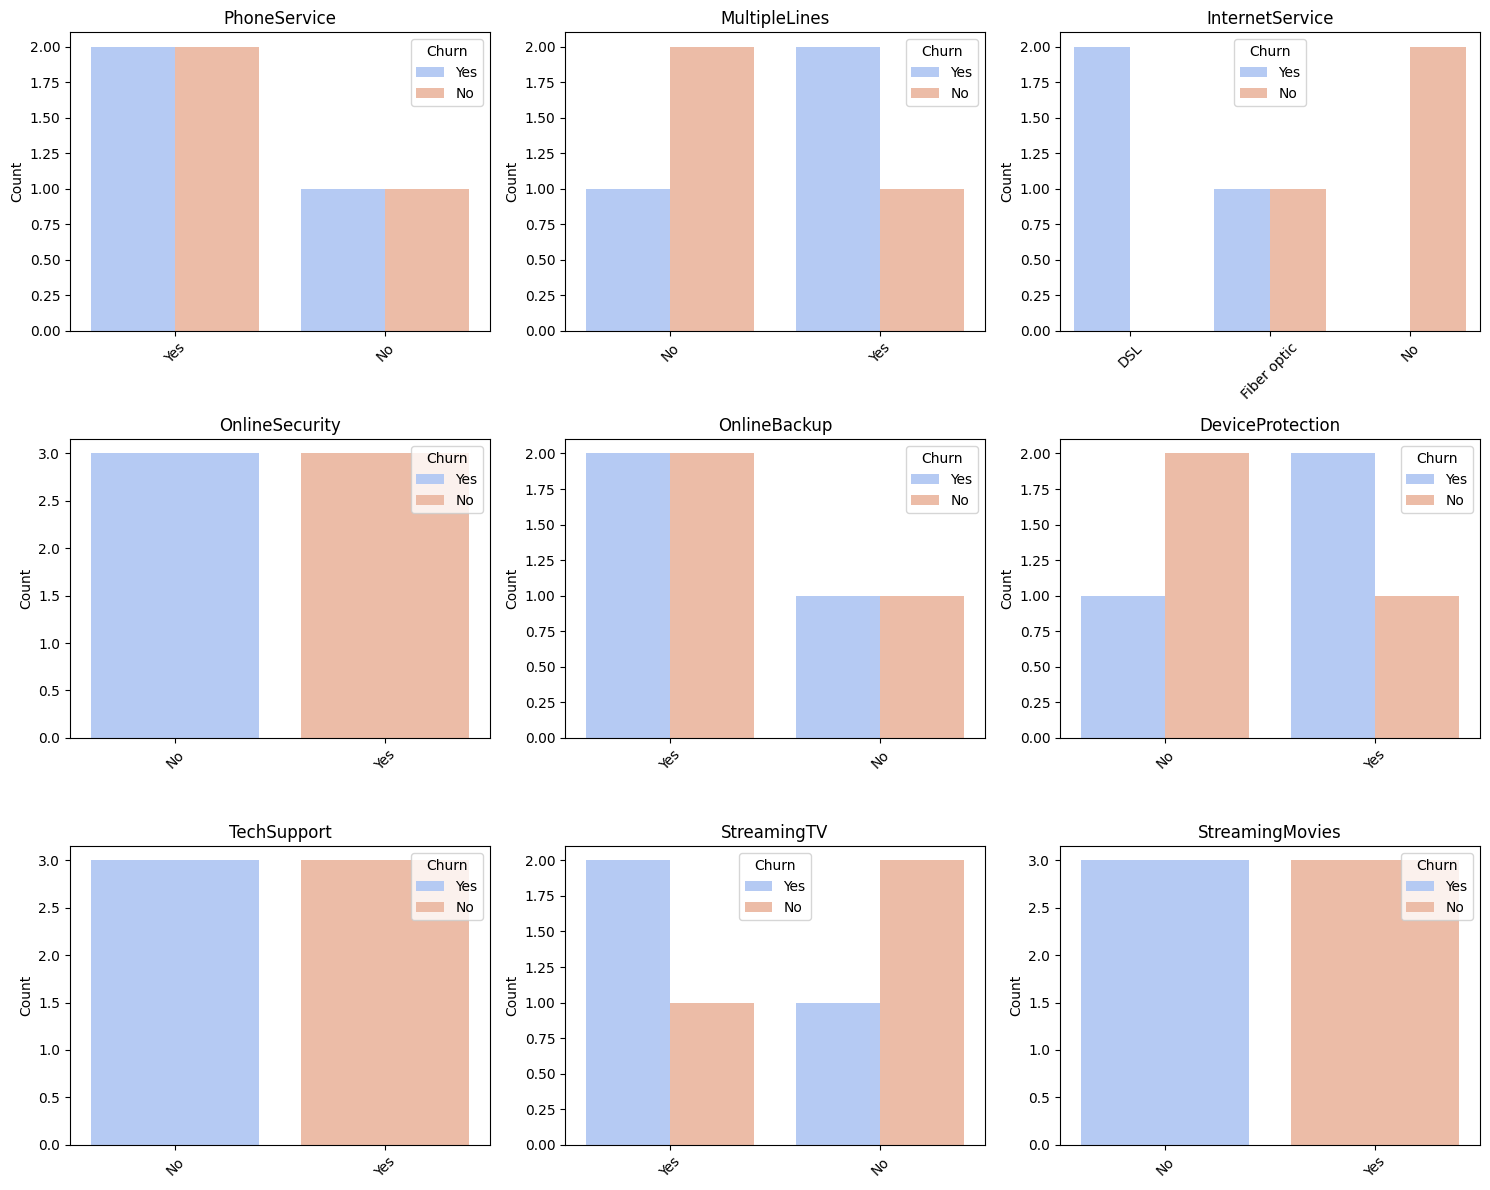

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace this with your actual data)
data = {
    'PhoneService': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'MultipleLines': ['No', 'No', 'Yes', 'No', 'Yes', 'Yes'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'No', 'Fiber optic', 'No'],
    'OnlineSecurity': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'OnlineBackup': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'DeviceProtection': ['No', 'No', 'Yes', 'No', 'Yes', 'Yes'],
    'TechSupport': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'StreamingTV': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
    'StreamingMovies': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Churn': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up subplots (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], palette="coolwarm", hue = df["Churn"])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


# The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and Streaming TV, churn rates are noticeably higher when these services are not used or are unavailable

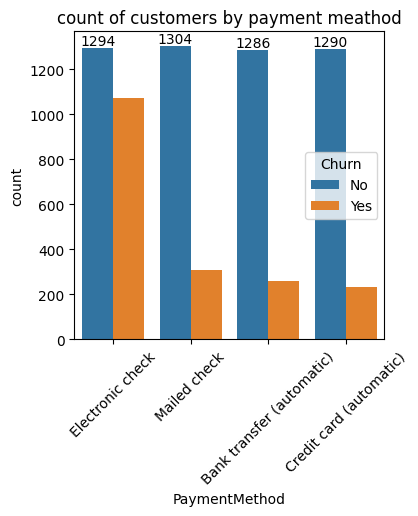

In [5]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "PaymentMethod",data = df , hue ="Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customers by payment meathod")
plt.xticks(rotation = 45)
plt.show()

# customer is likely to churn when he is using electronic check as payment